In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('compas-scores-two-years.csv')
df.shape

(7214, 53)

In [94]:
df.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


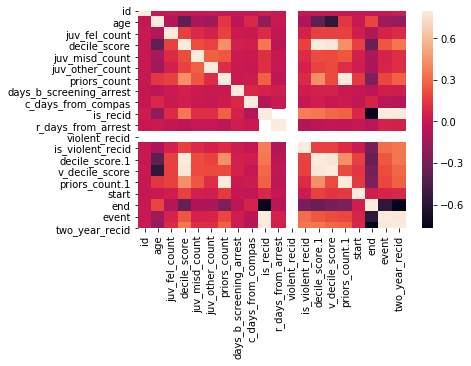

In [95]:
import seaborn as sns

corrmat = df.corr()
fig = plt.figure()

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [96]:
dfgb = df.groupby("race")
race_count = df.groupby("race")["name"].count()
dfgb.describe()


id                                                    \
                   count         mean          std    min      25%     50%   
race                                                                         
African-American  3696.0  5524.856872  3164.042069    3.0  2790.75  5517.0   
Asian               32.0  5770.093750  3202.147156  730.0  2655.50  6365.5   
Caucasian         2454.0  5488.236349  3165.242952    8.0  2760.25  5539.0   
Hispanic           637.0  5518.141287  3239.228092   21.0  2589.00  5548.0   
Native American     18.0  4379.388889  3073.921181  696.0  1927.00  3114.5   
Other              377.0  5356.838196  3257.307691    1.0  2475.00  5264.0   

                                       age             ... event       \
                      75%      max   count       mean  ...   75%  max   
race                                                   ...              
African-American  8239.25  11000.0  3696.0  32.740801  ...  1.00  1.0   
Asian             8285.25  10875.0    32.0  37.781250  ...  0.25  1.0   
Caucasian         8204.00  10992.0  2454.0  37.726569  ...  1.00  1.0   
Hispanic          8427.00  11001.0   637.0  35.455259  ...  1.00  1.0   
Native American   6679.25  10468.0    18.0  32.888889  ...  1.00  1.0   
Other             8277.00  10999.0   377.0  35.013263  ...  1.00  1.0   

                 two_year_recid                                               
                          count      mean       std  min  25%  50%  75%  max  
race                                                                          
African-American         3696.0  0.514340  0.499862  0.0  0.0  1.0  1.0  1.0  
Asian                      32.0  0.281250  0.456803  0.0  0.0  0.0  1.0  1.0  
Caucasian                2454.0  0.393643  0.488657  0.0  0.0  0.0  1.0  1.0  
Hispanic                  637.0  0.364207  0.481585  0.0  0.0  0.0  1.0  1.0  
Native American            18.0  0.555556  0.511310  0.0  0.0  1.0  1.0  1.0  
Other                     377.0  0.352785  0.478472  0.0  0.0  0.0  1.0  1.0  

[6 rows x 160 columns]

Text(0.5, 0.98, 'Score Frequency by Race')

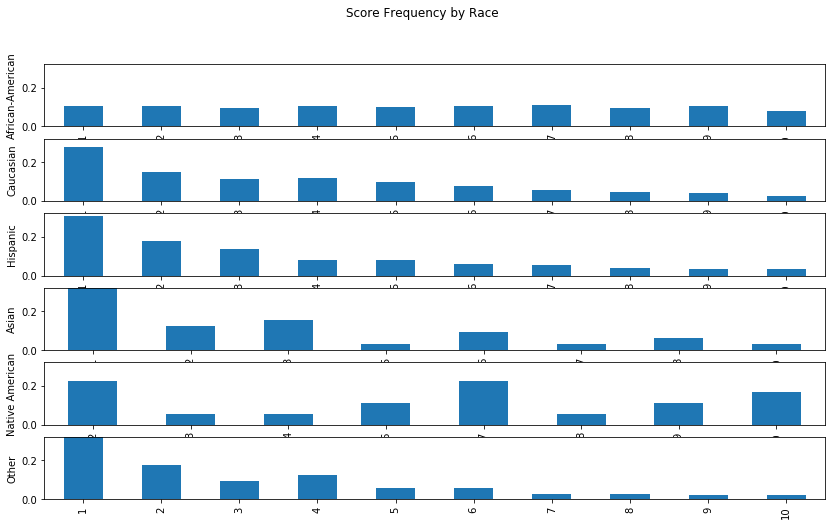

In [97]:
fig, ax = plt.subplots(6, figsize=(14, 8))
for (i, race) in enumerate(["African-American", "Caucasian","Hispanic","Asian","Native American","Other"]):
    (
        (dfgb
            .get_group(race)
            .groupby("decile_score")["name"].count() / race_count[race]
        )
        .plot(kind="bar", ax=ax[i])
    )
    ax[i].set_ylabel(race)
    ax[i].set_xlabel("")
    # set equal y limit for visual comparison
    ax[i].set_ylim(0, 0.32)

fig.suptitle("Score Frequency by Race")